In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [28]:
import os
from tqdm import tqdm

BASE_DIR = r'C:\Users\USER\faceemotion\UTKFace'
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)


100%|██████████| 23708/23708 [00:00<00:00, 503644.48it/s]


In [29]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,C:\Users\USER\faceemotion\UTKFace\100_0_0_2017...,100,0
1,C:\Users\USER\faceemotion\UTKFace\100_0_0_2017...,100,0
2,C:\Users\USER\faceemotion\UTKFace\100_1_0_2017...,100,1
3,C:\Users\USER\faceemotion\UTKFace\100_1_0_2017...,100,1
4,C:\Users\USER\faceemotion\UTKFace\100_1_0_2017...,100,1


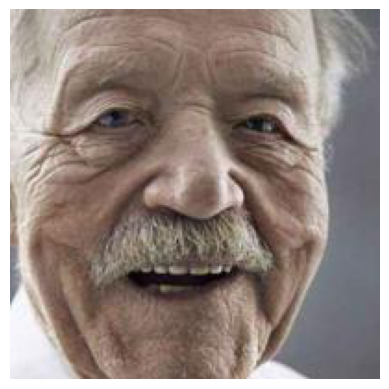

In [30]:
 # Map labels for gender
gender_dict = {0: 'Male', 1: 'Female'}

# Display an image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img)


In [32]:

# Define a function to extract features
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), resample=Image.LANCZOS)  # Changed line
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # Ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

# Extract features
X = extract_features(df['image'])

100%|██████████| 23708/23708 [02:28<00:00, 159.82it/s]


In [33]:
X.shape

(23708, 128, 128, 1)

In [34]:
# normalize the images
X = X/255.0

In [35]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [36]:
input_shape = (128, 128, 1)

In [37]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.4) (dense_1)
dropout_2 = Dropout(0.4) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [38]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [39]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30


593/593 [==============================] - 114s 189ms/step - loss: 10.6592 - gender_out_loss: 0.6671 - age_out_loss: 9.9920 - gender_out_accuracy: 0.5598 - gender_out_mae: 0.4727 - age_out_accuracy: 0.0579 - age_out_mae: 9.9920 - val_loss: 29.3522 - val_gender_out_loss: 0.5551 - val_age_out_loss: 28.7971 - val_gender_out_accuracy: 0.7176 - val_gender_out_mae: 0.3708 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 28.7971
Epoch 2/30
593/593 [==============================] - 113s 190ms/step - loss: 7.9676 - gender_out_loss: 0.4582 - age_out_loss: 7.5094 - gender_out_accuracy: 0.7812 - gender_out_mae: 0.3090 - age_out_accuracy: 0.0372 - age_out_mae: 7.5094 - val_loss: 29.4560 - val_gender_out_loss: 0.4854 - val_age_out_loss: 28.9706 - val_gender_out_accuracy: 0.7634 - val_gender_out_mae: 0.3024 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 28.9706
Epoch 3/30
593/593 [==============================] - 111s 187ms/step - loss: 7.2901 - gender_out_loss: 0.3627 - ag

Epoch 19/30
593/593 [==============================] - 127s 215ms/step - loss: 4.2193 - gender_out_loss: 0.1607 - age_out_loss: 4.0585 - gender_out_accuracy: 0.9299 - gender_out_mae: 0.1006 - age_out_accuracy: 0.0204 - age_out_mae: 4.0585 - val_loss: 19.4629 - val_gender_out_loss: 0.4719 - val_age_out_loss: 18.9909 - val_gender_out_accuracy: 0.8433 - val_gender_out_mae: 0.1806 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 18.9909
Epoch 20/30
593/593 [==============================] - 122s 206ms/step - loss: 4.1366 - gender_out_loss: 0.1522 - age_out_loss: 3.9844 - gender_out_accuracy: 0.9319 - gender_out_mae: 0.0951 - age_out_accuracy: 0.0292 - age_out_mae: 3.9844 - val_loss: 19.4157 - val_gender_out_loss: 0.5884 - val_age_out_loss: 18.8273 - val_gender_out_accuracy: 0.8332 - val_gender_out_mae: 0.1852 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 18.8273
Epoch 21/30
593/593 [==============================] - 123s 208ms/step - loss: 4.0002 - gender_out_loss: 0.1455 - ag

In [40]:
# Save the model
model.save("gender_age_model.h5")


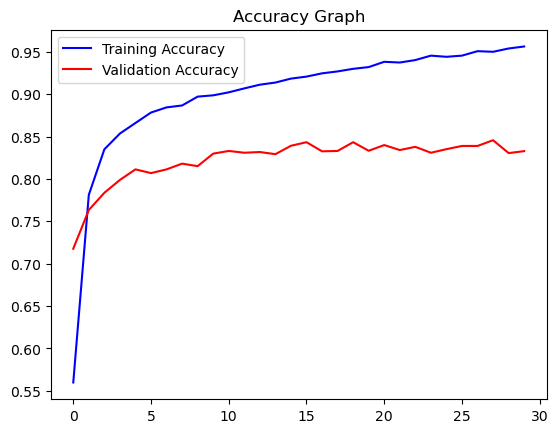

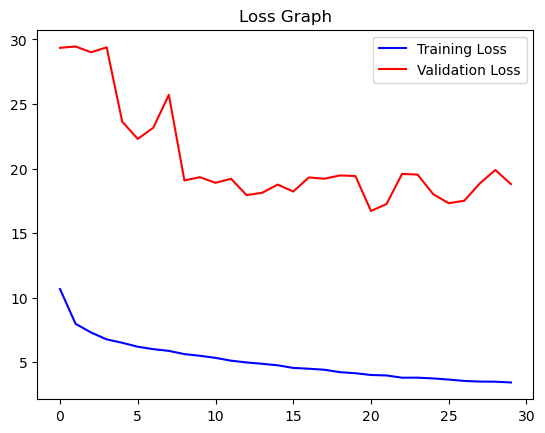

In [41]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

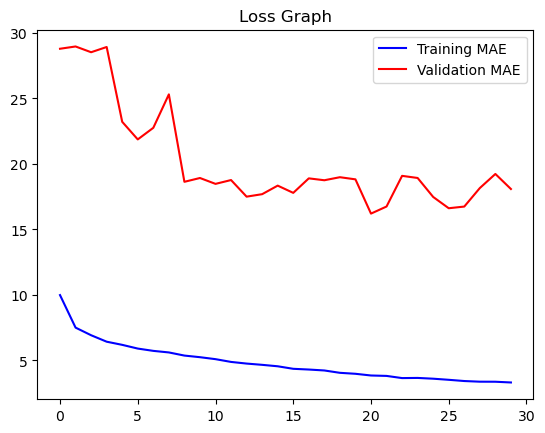

In [42]:
# plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 10
1/1 [==============================] - 0s 150ms/step
Predicted Gender: Male Predicted Age: 11


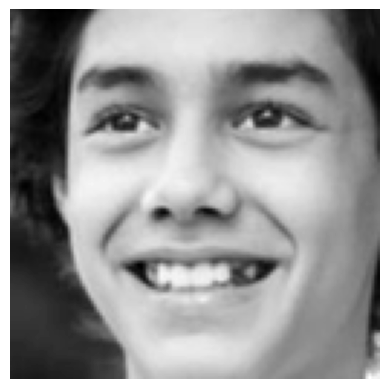

In [43]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 21
1/1 [==============================] - 0s 22ms/step
Predicted Gender: Male Predicted Age: 22


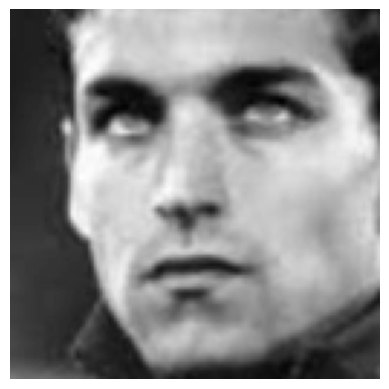

In [44]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 16
1/1 [==============================] - 0s 22ms/step
Predicted Gender: Female Predicted Age: 24


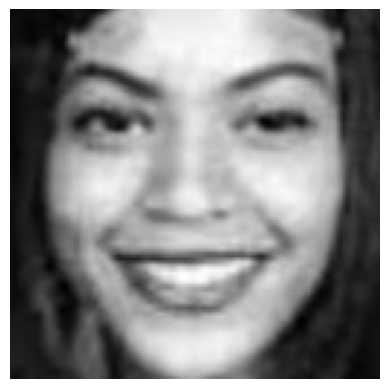

In [50]:
image_index = 1000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [49]:
from sklearn.metrics import accuracy_score, mean_absolute_error

# Initialize lists to store predictions
pred_gender_list = []
pred_age_list = []

# Iterate through all test samples
for i in range(len(X_test)):
    # Predict gender and age for the current sample
    pred_gender, pred_age = model.predict(X_test[i].reshape(1, 128, 128, 1))
    
    # Decode predicted gender
    pred_gender = gender_dict[round(pred_gender[0][0])]
    # Decode predicted age
    pred_age = round(pred_age[0][0])
    
    # Append predictions to lists
    pred_gender_list.append(pred_gender)
    pred_age_list.append(pred_age)

# Calculate accuracy for gender predictions
gender_accuracy = accuracy_score(y_gender_test, pred_gender_list)

# Calculate mean absolute error (MAE) for age predictions
age_mae = mean_absolute_error(y_age_test, pred_age_list)

print("Total Test Gender Accuracy:", gender_accuracy)
print("Total Test Age MAE:", age_mae)


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 33ms/step
Total Test Gender Accuracy: 0.0
Total Test Age MAE: 17.239350485027416


In [59]:
import cv2
import numpy as np

# Load the trained model
# Replace 'model.h5' with the path to your trained model file
from keras.models import load_model
model = load_model('gender_age_model.h5')

In [60]:

# Function to preprocess the image
def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize to match the input size of your model
    resized = cv2.resize(gray, (128, 128))
    # Normalize the image
    normalized = resized / 255.0
    # Reshape to match the input shape of your model
    reshaped = normalized.reshape((1, 128, 128, 1))
    return reshaped

# Map labels for gender
gender_dict = {0: 'Male', 1: 'Female'}

In [61]:
# Start capturing video from camera
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Preprocess the frame
    processed_frame = preprocess_image(frame)
    
    # Predict gender and age
    pred_gender, pred_age = model.predict(processed_frame)
    
    # Decode predicted gender
    pred_gender = gender_dict[round(pred_gender[0][0])]
    # Decode predicted age
    pred_age = round(pred_age[0][0])
    
    # Display the predicted gender and age on the frame
    cv2.putText(frame, f'Gender: {pred_gender}, Age: {pred_age}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
    # Display the frame
    cv2.imshow('Gender and Age Prediction', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


In [ ]:

# Function to preprocess the image
def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize to match the input size of your model
    resized = cv2.resize(gray, (128, 128))
    # Normalize the image
    normalized = resized / 255.0
    # Reshape to match the input shape of your model
    reshaped = normalized.reshape((1, 128, 128, 1))
    return reshaped

# Map labels for gender
gender_dict = {0: 'Male', 1: 'Female'}

# Function to predict gender and age from an image
def predict_gender_and_age(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not open or read image.")
        return None, None, None
    
    # Preprocess the image
    processed_img = preprocess_image(img)
    
    # Predict gender and age
    pred_gender, pred_age = model.predict(processed_img)
    
    # Decode predicted gender
    pred_gender = gender_dict[round(pred_gender[0][0])]
    # Decode predicted age
    pred_age = round(pred_age[0][0])
    
    return pred_gender, pred_age, img

# Example usage
def main():
    image_path = input("Enter the path to the image: ")
    predicted_gender, predicted_age, img = predict_gender_and_age(image_path)
    if predicted_gender is not None and predicted_age is not None:
        print("Predicted Gender:", predicted_gender)
        print("Predicted Age:", predicted_age)
        
        # Display the image with predicted gender and age
        cv2.putText(img, f'Gender: {predicted_gender}, Age: {predicted_age}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.imshow('Predicted Gender and Age', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()